<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/multi_peek_argrelmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#include <set>
#include <unordered_set>
#include <iostream>
#include <algorithm>

int main() {
  std::set<int> mySet {1, 2, 3, 4};
  std::unordered_set<int> myHashSet;

  // Copy elements from set to hash set using std::copy
  std::copy(mySet.begin(), mySet.end(), std::inserter(myHashSet, myHashSet.end()));

  // Print elements of hash set
  for (const auto& x : myHashSet) {
    std::cout << x << " ";
  }
  std::cout << std::endl;

  return 0;
}

In [ ]:

#include <iostream>
#include <chrono>

int main()
{
    const int N = 1000000000;

    // Original do-while loop
    auto start = std::chrono::high_resolution_clock::now();
    int sum = 0;
    int i = 0;
    do
    {
        sum += i;
        ++i;
    } while (i < N);
    auto elapsed = std::chrono::high_resolution_clock::now() - start;
    std::cout << "Original loop: " << elapsed.count() << " nanoseconds" << std::endl;

    // Optimized loop
    start = std::chrono::high_resolution_clock::now();
    sum = 0;
    i = 0;
    for (; i < N; ++i)
    {
        sum += i;
    }
    elapsed = std::chrono::high_resolution_clock::now() - start;
    std::cout << "Optimized loop: " << elapsed.count() << " nanoseconds" << std::endl;

    return 0;
}

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [ ]:

# 仮のXRDスペクトルを生成するためのパラメータ
amplitude1 = 10
mean1 = 30
sigma1 = 2
amplitude2 = 15
mean2 = 50
sigma2 = 3
amplitude3 = 5
mean3 = 70
sigma3 = 1

# 仮のXRDスペクトルを生成
x = np.linspace(0, 100, 1000)
y = amplitude1 * norm.pdf(x, mean1, sigma1) + amplitude2 * norm.pdf(x, mean2, sigma2) + amplitude3 * norm.pdf(x, mean3, sigma3)

In [ ]:

# XRDスペクトルからピークを検出
peaks = argrelmax(y, order=3)

peaks_x = x[peaks]
peaks_y = y[peaks]

# XRDスペクトルのピークをフィッティングするためのGMMモデルを作成
model = GaussianMixture(n_components=len(peaks))

# モデルをフィッティング
model.fit(peaks_x.reshape(-1, 1))

GaussianMixture()

In [ ]:

# Plot the XRD spectrum with the fitted peaks
plt.plot(x, y, label="XRD spectrum")
for mean, cov in zip(gmm.means_.flatten(), gmm.covariances_.flatten()):
    y_peak = np.exp(-0.5 * ((x - mean) / np.sqrt(cov))**2)
    plt.plot(x, y_peak, linestyle="dashed", label=f"Peak at {mean:.2f}")
plt.legend()
plt.show()

In [ ]:

import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [ ]:

# Generate a synthetic XRD spectrum with 3 peaks
np.random.seed(42)
x = np.linspace(0, 10, 1000)
y = np.exp(-0.5 * ((x - 3) / 1)**2) + np.exp(-0.5 * ((x - 6) / 2)**2) + np.exp(-0.5 * ((x - 9) / 0.5)**2)
y += np.random.normal(0, 0.1, y.shape)

In [ ]:

# Fit the XRD spectrum with a Gaussian mixture model with 3 components
gmm = GaussianMixture(n_components=3)
gmm.fit(x.reshape(-1, 1), y)

GaussianMixture(n_components=3)

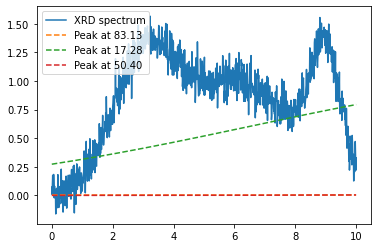

In [ ]:

# Plot the XRD spectrum with the fitted peaks
plt.plot(x, y, label="XRD spectrum")
for mean, cov in zip(gmm.means_.flatten(), gmm.covariances_.flatten()):
    y_peak = np.exp(-0.5 * ((x - mean) / np.sqrt(cov))**2)
    plt.plot(x, y_peak, linestyle="dashed", label=f"Peak at {mean:.2f}")
plt.legend()
plt.show()

In [ ]:

from scipy.signal import argrelmax

# Find the relative maxima of the XRD spectrum
# Find the relative maxima of the XRD spectrum
maxima_indices = argrelmax(y)[0]
maxima = x[maxima_indices]

# Plot the XRD spectrum with the detected peaks
plt.plot(x, y, label="XRD spectrum")
for peak in maxima:
    plt.plot(x, np.maximum(y, 0) * (x == peak), linestyle="dashed", label=f"Peak at {peak:.2f}")
plt.legend()
plt.show()

In [ ]:

# Fit the XRD spectrum with a Gaussian mixture model
gmm = GaussianMixture(n_components=len(maxima))
gmm.fit(x.reshape(-1, 1), y)

# Plot the XRD spectrum with the fitted peaks
plt.plot(x, y, label="XRD spectrum")
for mean, cov in zip(gmm.means_.flatten(), gmm.covariances_.flatten()):
    y_peak = np.exp(-0.5 * ((x - mean) / np.sqrt(cov))**2)
    plt.plot(x, y_peak, linestyle="dashed", label=f"Peak at {mean:.2f}")
plt.legend()
plt.show()

In [10]:

import numpy as np

def load_data():
    # Generate fake energy data
    energies = np.linspace(0, 10, 1000)
    
    # Generate fake intensity data using a combination of Gaussian functions
    intensities = 0.5 * np.exp(-0.5 * ((energies - 2) / 0.5) ** 2)
    intensities += 0.25 * np.exp(-0.5 * ((energies - 5) / 0.75) ** 2)
    intensities += 0.25 * np.exp(-0.5 * ((energies - 8) / 1.0) ** 2)
    
    return energies, intensities